**Instituto Tecnológico de Costa Rica**  
**Maestría en Electrónica**  
**MP6124. Procesamiento Adaptativo**    
**Profesor:** Juan Pablo Soto Quirós  
**Estudiantes:**  
- Juan Carlos Cruz Naranjo  
- Luis Alonso Murillo Rojas

## Tarea 2

### Problema 1.
Del libro _Fundamentals of Adaptive Filtering_ de Ali Sayed, implemente cada uno de los algoritmos de
gradiente estocástico que se encuentran en la **Tabla 5.1.**, página 230. 

<div style="align: left; text-align:center;">
<img src="tabla5.1.png" style="width:350px;"/>
<figcaption>Tabla 5.1. Algoritmos de Gradiente Estocástico</figcaption>
</div>

Cada uno de los algoritmos de la Tabla 5.1. da una aproximación a la solución del problema de optimización:  

<center>$\underset{w \in \mathbb{C}^{n}}{\text{min}}\mathbb{E}[|\textbf{d-u}w|^{2}]$</center>

donde $\textbf{d}$ es una variable aleatoria, $\textbf{u}$ es un vector fila aleatorio de tamaño _n_ y $w$ es un vector columna constante de tamaño _n_. Para la implementación de cada algoritmo, considere las siguientes indicaciones:
- Cada algoritmo debe ser implementado como una función.
- Los parámetros iniciales de cada función son los siguientes:
 - Observaciones de la variable aleatoria $\textbf{d}$ que se representan en el vector $d=[d_0\text{  }d_1\text{  }...\text{  }d_{s−1}]\in \mathbb{C}^{s}$, donde $d_j \in \mathbb{C}$ es la observación $j$ de $\textbf{d}$.  
 - Observaciones del vector aleatorio $\textbf{u}$, que se representan en la matriz $U= 
\begin{bmatrix} 
u_0 \\
\vdots \\
u_{s-1}
\end{bmatrix} \in \mathbb{C}^{s\times n}$, donde $u_j \in \mathbb{C}^{n}$ es la observación $j$ de $\textbf{u}$.

 - Vector inicial $w^{(−1)} \in \mathbb{C}^m$, el cual es un vector columna.
 - Tolerancia $tol > 0$ para el criterio de parada.
 - Iteraciones máximas $iterMax > 0$.
- Los parámetros finales son el número de iteraciones $k$ y el vector $w^{(k)}$ que aproxima la solución del problema (1).
- Utilice nombres significativos para definir cada una de las funciones.
- El criterio de parada de cada algoritmo será la condición $||w^{(k)} - w^{(k−1)}||_2 < tol$ o cuando el número de iteraciones es mayor a $iterMax$.

- En el método LMS con tamaño de paso variante, puede utilizar como tamaño de paso $\mu_i = \frac{2}{1+i}$ en cada iteración. Si considera oportuno, puede utilizar otro tamaño de paso. De ser así, debe justificar porque seleccionó otro tamaño de paso $\mu_i$.
- Cada método debe generar dos gráficas: una de iteraciones versus error y otra de iteraciones versus valor mínimo. El error se medirá con el criterio $e_k = ||w^{(k)} - w^{(k−1)}||_2$ y el valor mínimo se medirá con el criterio:

<center>$m_k = \hat{R}_{d_kd_k}-\left(\hat{R}_{d_ku_k}\right)^{*}w^{(k)}-\left(w^{(k)}\right)^{*}\hat{R}_{d_ku_k} + \left(w^{(k)}\right)^{*}\hat{R}_{u_ku_k}w^{(k)}$</center>


Donde $\hat{R}_{d_kd_k}=d_k(d_k)^*$, $\hat{R}_{d_ku_k}=d_k(u_k)^*$ y $\hat{R}_{u_ku_k}=(u_k)^*u_k$.

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [55]:
# Plotter
def plot_iterations(n_iterations, y_vector_a, y_vector_b, title):
    x = np.linspace(0, n_iterations, num = n_iterations)
    plt.suptitle(title, fontsize = 16)
    plt.subplot(2,1,1)
    plt.plot(x, y_vector_a, '-')
    plt.title("Error vs iterations")
    plt.xlabel("iterations")
    plt.ylabel("error e_k")
    plt.grid()
    plt.show()
    
    plt.subplot(2,1,2)
    plt.plot(x, y_vector_b, '-')
    plt.title("Minimum vs iterations")
    plt.xlabel("iterations")
    plt.ylabel("minimum m_k")
    plt.grid()
    plt.show()

In [130]:
def min_value(dk, uk, wk):
    Rdd = dk * np.conjugate(dk)
    Rdu = dk * np.conjugate(np.transpose(uk))
    Ruu = np.matmul(uk, np.conjugate(np.transpose(uk)))
    mk = Rdd - np.matmul(np.conj(np.transpose(Rdu)), wk) - np.matmul(np.conjugate(np.transpose(wk)), Rdu) + np.matmul(np.conjugate(np.transpose(wk)), (Ruu * wk))
    return mk

In [149]:
def lms_constant_step_size(d, u, w_1, tol, max_iter):
    # los parámetros de entrada tol y max_iter deben de ser mayores a 0
    if tol <= 0 or max_iter <= 0:
        raise(RuntimeError("Tol or max_iter must be greater than 0"))
    
    # inicializacion de variables
    k = 0
    w = [w_1]   # aproximacion del problema
    mu = 0.5    # Step size. Usually 2^(-m) for m > 0. In this case: m=1
    error = []
    m = []      # valor minimo
    
    # iteracion
    for k in range(max_iter):
        # condiciones de parada
        if k >= 1:    # evaluar el error a partir de la segunda iteracion
            er = np.linalg.norm((w[k] - w[k - 1]), 'fro')
            error.append(er)
            if er < tol:
                break
        
        # calculo de la aproximacion
        u_k = u[k].reshape(1, u.shape[1])
        u_k_conj = np.conjugate(np.transpose(u_k))
        w_k_1 = w_1 if k == 0 else w[k - 1]
        e_k = d[k] - np.matmul(u_k, w_k_1)
        w_k = w_k_1 + (mu * u_k_conj * e_k)
        w.append(w_k)
        
        # calculo del valor minimo
        m_k = min_value(d[k], u_k, w_k)[0,0]
        m.append(m_k)
    
    # graficar resultados
    plot_iterations(k, error, m[1:], "LMS with constant step-size")
    
    return (k, w[-1])

In [155]:
def lms_time_variant_step_size(d, u, w_1, tol, max_iter):
    # los parámetros de entrada tol y max_iter deben de ser mayores a 0
    if tol <= 0 or max_iter <= 0:
        raise(RuntimeError("Tol or max_iter must be greater than 0"))
    
    # inicializacion de variables
    k = 0
    w = [w_1]   # aproximacion del problema
    error = []
    m = []      # valor minimo
    
    # iteracion
    for k in range(max_iter):
        # condiciones de parada
        if k >= 1:    # evaluar el error a partir de la segunda iteracion
            er = np.linalg.norm((w[k] - w[k - 1]), 'fro')
            error.append(er)
            if er < tol:
                break
        
        # calculo de la aproximacion
        mu = mu = 2.0 / (1 + k)
        u_k = u[k].reshape(1, u.shape[1])
        u_k_conj = np.conjugate(np.transpose(u_k))
        w_k_1 = w_1 if k == 0 else w[k - 1]
        e_k = d[k] - np.matmul(u_k, w_k_1)
        w_k = w_k_1 + (mu * u_k_conj * e_k)
        w.append(w_k)
        
        # calculo del valor minimo
        m_k = min_value(d[k], u_k, w_k)[0,0]
        m.append(m_k)
    
    # graficar resultados
    plot_iterations(k, error, m[1:], "LMS with time-variant step-size")
    
    return (k, w[-1])

In [173]:
def e_nlms(d, u, w_1, tol, max_iter):
    # los parámetros de entrada tol y max_iter deben de ser mayores a 0
    if tol <= 0 or max_iter <= 0:
        raise(RuntimeError("Tol or max_iter must be greater than 0"))
    
    # inicializacion de variables
    mu = 0.5
    k = 0
    w = [w_1]   # aproximacion del problema
    error = []
    m = []      # valor minimo
    epsilon = 0.5
    
    # iteracion
    for k in range(max_iter):
        # condiciones de parada
        if k >= 1:    # evaluar el error a partir de la segunda iteracion
            er = np.linalg.norm((w[k] - w[k - 1]), 'fro')
            error.append(er)
            if er < tol:
                break
        
        # calculo de la aproximacion
        u_k = u[k].reshape(1, u.shape[1])
        u_k_conj = np.conjugate(np.transpose(u_k))
        w_k_1 = w_1 if k == 0 else w[k - 1]
        e_k = d[k] - np.matmul(u_k, w_k_1)
        w_k = w_k_1 + ((mu / (epsilon + pow(np.linalg.norm(u_k, 'fro'), 2))) * u_k_conj * e_k)
        w.append(w_k)
        
        # calculo del valor minimo
        m_k = min_value(d[k], u_k, w_k)[0,0]
        m.append(m_k)
    
    # graficar resultados
    plot_iterations(k, error, m[1:], "e-NLMS")
    
    return (k, w[-1])

In [174]:
def e_nlms_power_norm(d, u, w_1, tol, max_iter):
    # los parámetros de entrada tol y max_iter deben de ser mayores a 0
    if tol <= 0 or max_iter <= 0:
        raise(RuntimeError("Tol or max_iter must be greater than 0"))
    
    # inicializacion de variables
    mu = 0.5
    k = 0
    w = [w_1]   # aproximacion del problema
    error = []
    m = []      # valor minimo
    epsilon = 0.5
    p_1 = 0
    p = []
    beta = 0.9
    
    # iteracion
    for k in range(max_iter):
        # condiciones de parada
        if k >= 1:    # evaluar el error a partir de la segunda iteracion
            er = np.linalg.norm((w[k] - w[k - 1]), 'fro')
            error.append(er)
            if er < tol:
                break
        
        # calculo de la aproximacion
        u_k = u[k].reshape(1, u.shape[1])
        u_k_conj = np.conjugate(np.transpose(u_k))
        w_k_1 = w_1 if k == 0 else w[k - 1]
        e_k = d[k] - np.matmul(u_k, w_k_1)
        
        p_k_1 = p_1 if k == 0 else p[k - 1]
        p_k = (beta * p_k_1) + ((1 - beta) * pow(np.linalg.norm(u_k, 'fro'), 2))
        p.append(p_k)
        
        w_k = w_k_1 + ((mu / (epsilon + p_k)) * u_k_conj * e_k)
        w.append(w_k)
        
        # calculo del valor minimo
        m_k = min_value(d[k], u_k, w_k)[0,0]
        m.append(m_k)
    
    # graficar resultados
    plot_iterations(k, error, m[1:], "e-NLMS with power normalization")
    
    return (k, w[-1])

In [175]:
def signal_error_lms(d, u, w_1, tol, max_iter):
    # los parámetros de entrada tol y max_iter deben de ser mayores a 0
    if tol <= 0 or max_iter <= 0:
        raise(RuntimeError("Tol or max_iter must be greater than 0"))
    
    # inicializacion de variables
    k = 0
    w = [w_1]   # aproximacion del problema
    mu = 0.5    # Step size. Usually 2^(-m) for m > 0. In this case: m=1
    error = []
    m = []      # valor minimo
    
    # iteracion
    for k in range(max_iter):
        # condiciones de parada
        if k >= 1:    # evaluar el error a partir de la segunda iteracion
            er = np.linalg.norm((w[k] - w[k - 1]), 'fro')
            error.append(er)
            if er < tol:
                break
        
        # calculo de la aproximacion
        u_k = u[k].reshape(1, u.shape[1])
        u_k_conj = np.conjugate(np.transpose(u_k))
        w_k_1 = w_1 if k == 0 else w[k - 1]
        e_k = d[k] - np.matmul(u_k, w_k_1)
        w_k = w_k_1 + (mu * u_k_conj * np.sign(e_k))
        w.append(w_k)
        
        # calculo del valor minimo
        m_k = min_value(d[k], u_k, w_k)[0,0]
        m.append(m_k)
    
    # graficar resultados
    plot_iterations(k, error, m[1:], "Signal-error LMS")
    
    return (k, w[-1])

In [181]:
def leaky_lms(d, u, w_1, tol, max_iter):
    # los parámetros de entrada tol y max_iter deben de ser mayores a 0
    if tol <= 0 or max_iter <= 0:
        raise(RuntimeError("Tol or max_iter must be greater than 0"))
    
    # inicializacion de variables
    k = 0
    w = [w_1]   # aproximacion del problema
    mu = 0.5    # Step size. Usually 2^(-m) for m > 0. In this case: m=1
    error = []
    m = []      # valor minimo
    alfa = 3
    
    # iteracion
    for k in range(max_iter):
        # condiciones de parada
        if k >= 1:    # evaluar el error a partir de la segunda iteracion
            er = np.linalg.norm((w[k] - w[k - 1]), 'fro')
            error.append(er)
            if er < tol:
                break
        
        # calculo de la aproximacion
        u_k = u[k].reshape(1, u.shape[1])
        u_k_conj = np.conjugate(np.transpose(u_k))
        w_k_1 = w_1 if k == 0 else w[k - 1]
        e_k = d[k] - np.matmul(u_k, w_k_1)
        w_k = ((1 - mu*alfa) * w_k_1) + (mu * u_k_conj * e_k)
        w.append(w_k)
        
        # calculo del valor minimo
        m_k = min_value(d[k], u_k, w_k)[0,0]
        m.append(m_k)
    
    # graficar resultados
    plot_iterations(k, error, m[1:], "Leaky-LMS")
    
    return (k, w[-1])

In [196]:
def lms(d, u, w_1, tol, max_iter):
    # los parámetros de entrada tol y max_iter deben de ser mayores a 0
    if tol <= 0 or max_iter <= 0:
        raise(RuntimeError("Tol or max_iter must be greater than 0"))
    
    # inicializacion de variables
    k = 0
    w = [w_1]   # aproximacion del problema
    mu = 0.5    # Step size. Usually 2^(-m) for m > 0. In this case: m=1
    error = []
    m = []      # valor minimo
    
    # iteracion
    for k in range(max_iter):
        # condiciones de parada
        if k >= 1:    # evaluar el error a partir de la segunda iteracion
            er = np.linalg.norm((w[k] - w[k - 1]), 'fro')
            error.append(er)
            if er < tol:
                break
        
        # calculo de la aproximacion
        u_k = u[k].reshape(1, u.shape[1])
        u_k_conj = np.conjugate(np.transpose(u_k))
        w_k_1 = w_1 if k == 0 else w[k - 1]
        e_k = d[k] - np.matmul(u_k, w_k_1)
        w_k = w_k_1 + (u_k_conj * (mu * e_k * pow(abs(e_k), 2)))
        w.append(w_k)
        
        # calculo del valor minimo
        m_k = min_value(d[k], u_k, w_k)[0,0]
        m.append(m_k)
    
    # graficar resultados
    plot_iterations(k, error, m[1:], "LMS")
    
    return (k, w[-1])

In [202]:
def lmmn(d, u, w_1, tol, max_iter):
    # los parámetros de entrada tol y max_iter deben de ser mayores a 0
    if tol <= 0 or max_iter <= 0:
        raise(RuntimeError("Tol or max_iter must be greater than 0"))
    
    # inicializacion de variables
    k = 0
    w = [w_1]   # aproximacion del problema
    mu = 0.5    # Step size. Usually 2^(-m) for m > 0. In this case: m=1
    error = []
    m = []      # valor minimo
    delta = 0.5
    
    # iteracion
    for k in range(max_iter):
        # condiciones de parada
        if k >= 1:    # evaluar el error a partir de la segunda iteracion
            er = np.linalg.norm((w[k] - w[k - 1]), 'fro')
            error.append(er)
            if er < tol:
                break
        
        # calculo de la aproximacion
        u_k = u[k].reshape(1, u.shape[1])
        u_k_conj = np.conjugate(np.transpose(u_k))
        w_k_1 = w_1 if k == 0 else w[k - 1]
        e_k = d[k] - np.matmul(u_k, w_k_1)
        w_k = w_k_1 + (u_k_conj * (mu * e_k * (delta + ((1 - delta) * pow(abs(e_k), 2)))))
        w.append(w_k)
        
        # calculo del valor minimo
        m_k = min_value(d[k], u_k, w_k)[0,0]
        m.append(m_k)
    
    # graficar resultados
    plot_iterations(k, error, m[1:], "LMMN")
    
    return (k, w[-1])

### Problema 2.  

Considere el siguiente problema:  

**Estimación de un Canal de Respuesta Finito.** Considere un canal de respuesta finito, el cual se representa
a través de una función de transferencia $\mathcal{C}$ definida por:

<center>$\mathcal{C}(z)= \sum_{k=0}^{p-1}c_kz^{-k}$</center>

El canal $\mathcal{C}$ es estimulado con una secuencia de valores aleatorios $\{\textbf{u}(i)\}$, donde cada $\textbf{u}(i)$ es una variable aleatoria con media igual a cero. La salida obtenida después de pasar por el canal es otra secuencia de valores aleatorios $\{\textbf{d}(i)\}$, donde cada $\textbf{d}(i)$ es una variable aleatoria con media igual a cero definido por $\textbf{d}(i) = \textbf{u}_ic + \textbf{v}(i)$, donde:

- $\{\textbf{v}(i)\}$ es una secuencia de variables aleatorias ortogonales entre si, con media cero. La secuencia $\{\textbf{v}(i)\}$ es ortogonal a la secuencia $\{\textbf{u}(i)\}$.

- $\textbf{u}_i$ es un vector fila aleatorio de tamaño $p$ tal que $\textbf{u}_i = [\textbf{u}(i)\text{  }\textbf{u}(i − 1)\text{  }\textbf{u}(i − 2)\text{  }...\text{  }\textbf{u}_i(i − p + 1)]$.

- $c$ es un vector columna constante tal que $c= 
\begin{bmatrix} 
c_0 \\
\vdots \\
c_{p-1}
\end{bmatrix} \in \mathbb{R}^{n}$, donde cada $c_j$ son las constantes que pertenecen al canal de respuesta finita.

El objetivo de este problema es encontrar los coeficientes $c_0$, $c_1$, $\dots$, $c_{p−1}$ del canal de respuesta finito, es decir, el vector $c$. Una alternativa para estimar el vector $c$ es resolver el problema de optimización:

<center>$\underset{c \in \mathbb{C}^{n}}{\text{min}}\mathbb{E}[|\textbf{d}(i)-\textbf{u}_ic|^{2}]$</center>

Es conocido que la solución exacta del problema anterior se obtiene utilizando matrices de covarianza $R_{\textbf{d}_i\textbf{u}_i}$ y $R_{\textbf{u}_i\textbf{u}_i}$. Sin embargo, en la práctica rara vez se tiene conocimiento de estas matrices de covarianza. En estos casos, se utilizan observaciones de $\textbf{d}(i)$ y $\textbf{u}_i$. Estas observaciones se definen como $d = [d_0\text{  }d_1\text{  }\dots\text{  }d_{s−1}] \in \mathbb{R}^{s}$ y $U= 
\begin{bmatrix} 
u_0 \\
u_1 \\
\vdots \\
u_{s-1}
\end{bmatrix} \in \mathbb{R}^{s \times n}$, donde $u_j$ es un vector fila de tamaño $n$.


**(a)** Aproxime el vector $c \in \mathbb{R}^{10}$ del canal $\mathcal{C}$ utilizando las observaciones (o muestras) que se encuentran en los archivos $\texttt{d.txt}$ y $\texttt{U.txt}$. El archivo $\texttt{d.txt}$ contiene un vector fila $d \in \mathbb{R}^{100000}$ con $100000$ muestras de $\textbf{d}(i)$ y el archivo
$\texttt{U.txt}$ contiene una matriz $U \in \mathbb{R}^{100000\times 5}$ con $100000$ muestras de $\textbf{u}_i$. Para esto, utilice cada uno de los métodos implementados en la $\textbf{Pregunta 1}$, con una tolerancia de $10^{-5}$ y un vector columna inicial $c^{(-1)}=[0\text{  }0\text{  }\dots \text{  }0]^T \in R^{10}$.

**(b)** ¿Cuál de los métodos iterativos genera una mejor aproximación del vector $c$? Justifique su respuesta.

**(c)** Si se sabe de antemano que los coeficientes $c_0$, $\dots$, $c_9$ son números enteros, ¿cuál sería el valor exacto del vector $c$?. Justifique su respuesta.  

**Nota:** La justificación de las preguntas **(b)** y **(c)** se puede realizar utilizando las gráficas generadas en cada una de las funciones.

In [138]:
d = np.loadtxt("d.txt", delimiter = ",")
U = np.loadtxt("U.txt", dtype = 'i', delimiter = ',')
c_k = np.zeros([10, 1])
tol = 1e-5
iterMax = 1000
print('d:', d.shape)
print('U:', U.shape)
print('c_k:', c_k.shape)

d: (100000,)
U: (100000, 10)
c_k: (10, 1)


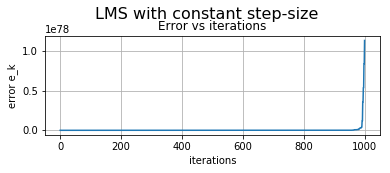

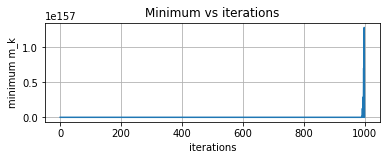

In [151]:
(k_iterations, ck) = lms_constant_step_size(d, U, c_k, tol, iterMax)

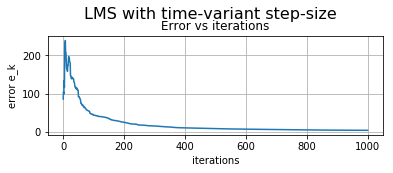

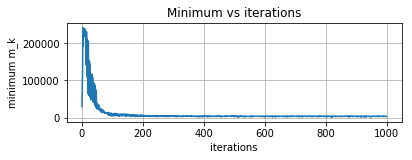

In [154]:
(k_iterations, ck) = lms_time_variant_step_size(d, U, c_k, tol, iterMax)

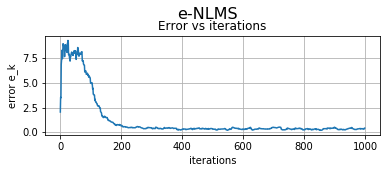

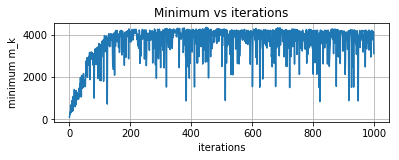

In [177]:
(k_iterations, ck) = e_nlms(d, U, c_k, tol, iterMax)

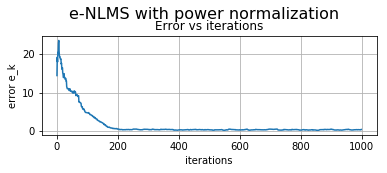

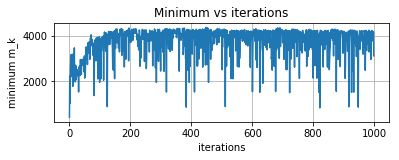

In [178]:
(k_iterations, ck) = e_nlms_power_norm(d, U, c_k, tol, iterMax)

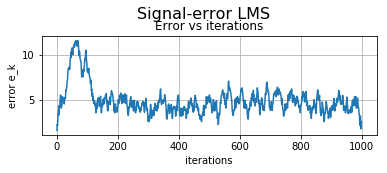

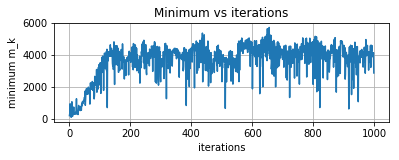

In [179]:
(k_iterations, ck) = signal_error_lms(d, U, c_k, tol, iterMax)

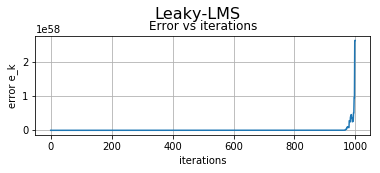

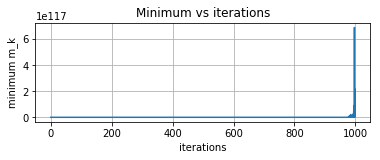

In [182]:
(k_iterations, ck) = leaky_lms(d, U, c_k, tol, iterMax)

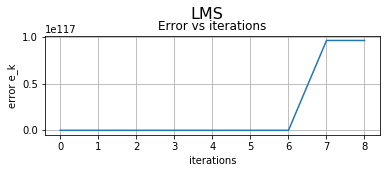

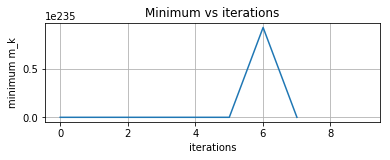

In [205]:
(k_iterations, ck) = lms(d, U, c_k, tol, iterMax)

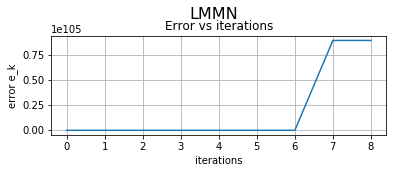

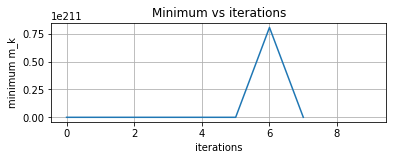

In [206]:
(k_iterations, ck) = lmmn(d, U, c_k, tol, iterMax)